In [3]:
# Basic Imports

import pandas as pd
import numpy as np

In [18]:
# Visualization Imports

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# K means imports

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [26]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [113]:
cardiac = pd.read_csv('cardiacData.csv',header=None)
cardiac.head()

,0,1,2,3,4
0,84,0,55,0,0
1,76,0,80,0,0
2,50,0,80,0,0
3,60,0,44,0,0
4,106,0,77,1,0


In [114]:
cardiac.columns = ['HR', 'ST', 'Age', 'NPHA', 'Outcome']
cardiac.head()

,HR,ST,Age,NPHA,Outcome
0,84,0,55,0,0
1,76,0,80,0,0
2,50,0,80,0,0
3,60,0,44,0,0
4,106,0,77,1,0


<AxesSubplot:>

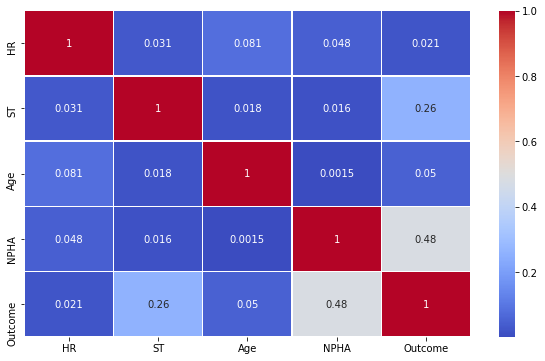

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(cardiac.corr(), cmap ='coolwarm', linewidths = 0.30, annot = True)

In [116]:
cardiac = Normalizer().fit_transform(cardiac)
cardiac = pd.DataFrame(cardiac)

In [117]:
# create 3 clusters to start
kmeans = KMeans(n_clusters=3).fit(cardiac.values)

In [118]:
print(np.unique(kmeans.labels_, return_counts=True))

(array([0, 1, 2]), array([109,  79,  62], dtype=int64))


In [120]:
kmeans_3 = pd.DataFrame(kmeans.labels_, columns=['cluster'])
print(kmeans_3)

     cluster
0          1
1          0
2          2
3          1
4          1
..       ...
245        0
246        0
247        2
248        0
249        1

[250 rows x 1 columns]


In [121]:
# Wouldn't it be nice to visualize these clusters? But how do we plot so many dimensions?

# Enter PCA
pca = PCA(n_components=2).fit(cardiac)

# Perform the transform
pca_trans = pca.transform(cardiac)

pca_trans_df = pd.DataFrame(pca_trans, columns=['pca1', 'pca2'])

# Add it to dataframe
kmeans_3 = pd.concat([kmeans_3, pca_trans_df], axis=1)
kmeans_3.sample(5)

,cluster,pca1,pca2
52,1,0.163500,0.004399
215,2,-0.252106,0.019228
162,1,0.082013,-0.006630
153,2,-0.332167,0.043193
161,1,0.124012,-0.001795


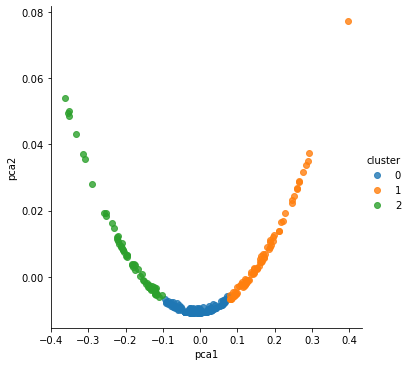

In [122]:
fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_3, hue='cluster', fit_reg=False)
plt.show()

Obj. Func: 1.9085052848679331
Obj. Func: 0.8744181391740151
Obj. Func: 0.6028711453085287
Obj. Func: 0.39717309960693736
Obj. Func: 0.2832996959485025
Obj. Func: 0.20025284192595555
Obj. Func: 0.14853864561707028
Obj. Func: 0.12194334767985865
Obj. Func: 0.10200267366431298


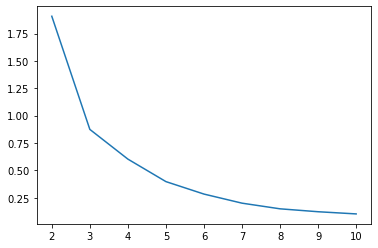

In [123]:
clusterRange = range(2,11)

objFuncs = []
for i in clusterRange:
    kmeans = KMeans(n_clusters=i).fit(cardiac.values)
    print("Obj. Func:", kmeans.inertia_)
    objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

Text(0.5, 1.0, 'Silhouette Score vs Number of Clusters')

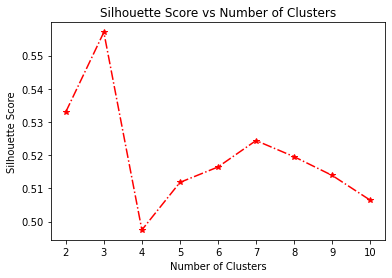

In [125]:
from sklearn.metrics import silhouette_score

ss= []

k_range=range(2,11)

#Fit the KMeans model for each n_clusters=k
k_means = [KMeans(n_clusters=k).fit(cardiac.values) for k in k_range]
sscores = [silhouette_score(cardiac.values, kmean.labels_) for kmean in k_means]

plt.plot(list(k_range), sscores, 'r*-.')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")

## Inertia vs Silhouette Score

As we can see, we have high Silhouette scores for n_cluster = 2, 3 and 7.
After further consideration using Inertia, we narrow down our top clusters 3 and 7. 

In [126]:
cardiac['Cluster'] = kmeans_3['cluster']

## k_cluster =3

In [128]:
for y in range(3):

    positive = 0
    negative = 0

    for x in cardiac[cardiac['Cluster']==y][4]:
        if x == 0.0: negative+=1
        else: positive+=1

    print("Cluster " + str(y))
    print("Negative: " + str(negative) + "\t Positive: " + str(positive))
    print("Purity: " + str(positive/negative)  + "\n\n")

Cluster 0
Negative: 76	 Positive: 33
Purity: 0.4342105263157895


Cluster 1
Negative: 52	 Positive: 27
Purity: 0.5192307692307693


Cluster 2
Negative: 39	 Positive: 23
Purity: 0.5897435897435898




## k_cluster = 7
lets see what that looks like

In [147]:
cardiac = pd.read_csv('cardiacData.csv',header=None)
#cardiac.head()

cardiac.columns = ['HR', 'ST', 'Age', 'NPHA', 'Outcome']
cardiac.head()

cardiac = Normalizer().fit_transform(cardiac)
cardiac = pd.DataFrame(cardiac)

In [148]:
kmeans = KMeans(n_clusters=7).fit(cardiac.values)
print(np.unique(kmeans.labels_, return_counts=True))

kmeans_7 = pd.DataFrame(kmeans.labels_, columns=['cluster'])


(array([0, 1, 2, 3, 4, 5, 6]), array([55, 35,  8, 17, 60, 47, 28], dtype=int64))


In [149]:
pca = PCA(n_components=2).fit(cardiac)

# Perform the transform
pca_trans = pca.transform(cardiac)

pca_trans_df = pd.DataFrame(pca_trans)

# Add it to dataframe
kmeans_7 = pd.concat([kmeans_7, pca_trans_df], axis=1)
kmeans_7.sample(5)

,cluster,0,1
79,4,-0.039972,-0.010634
118,6,-0.210908,0.008887
132,1,-0.091654,-0.007854
185,4,-0.032982,-0.010805
42,4,-0.002690,-0.011028


In [150]:
# check to see how many components would be best
pca.explained_variance_ratio_

array([0.98796074, 0.00908393])

In [152]:
kmeans_7[1]

0      0.005879
1     -0.009939
2      0.019402
3     -0.002428
4     -0.001467
         ...   
245   -0.009833
246   -0.010651
247    0.003056
248   -0.011027
249    0.004414
Name: 1, Length: 250, dtype: float64

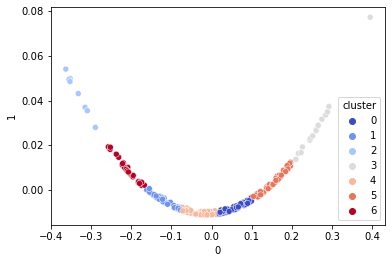

In [154]:
# fig = sns.lmplot(x = 'pca1', y='pca2', data=kmeans_7, hue='cluster', fit_reg=False)
sns.scatterplot(x=kmeans_7[0], y=kmeans_7[1], hue=kmeans_7['cluster'],palette='coolwarm')
plt.show()

In [156]:
cardiac['Cluster_7'] = kmeans_7['cluster']
for y in range(7):

    positive = 0
    negative = 0

    for x in cardiac[cardiac['Cluster_7']==y][4]:
        if x == 0.0: negative+=1
        else: positive+=1

    print("Cluster " + str(y))
    print("Negative: " + str(negative) + "\t Positive: " + str(positive))
    print("Purity: " + str(positive/negative)  + "\n\n")

Cluster 0
Negative: 39	 Positive: 16
Purity: 0.41025641025641024


Cluster 1
Negative: 25	 Positive: 10
Purity: 0.4


Cluster 2
Negative: 3	 Positive: 5
Purity: 1.6666666666666667


Cluster 3
Negative: 10	 Positive: 7
Purity: 0.7


Cluster 4
Negative: 42	 Positive: 18
Purity: 0.42857142857142855


Cluster 5
Negative: 31	 Positive: 16
Purity: 0.5161290322580645


Cluster 6
Negative: 17	 Positive: 11
Purity: 0.6470588235294118


